In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [5]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'selectivity'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'update_selectivity', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [7]:
folder = './autorestore/preprocessing'
for var in ('time_ax', 'traces', 'events', 'areas', 'cycles',
            'is_rewardt', 'is_CSmt', 'CYCLE_START', 'CS_DURATION', 'DELAY'): 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))

In [8]:
trial_types = np.r_[['CSmt', 'rewardt']]

# CHOOSE WHAT PERIOD DEFINES THE CS WITH REF. TO CYCLE START
cs_timeframe = (-CYCLE_START, CS_DURATION-CYCLE_START+DELAY)
baseline_timeframe = (-CYCLE_START-4, -CYCLE_START)

selectivity = {}
for t in trial_types:
    
    # this one selects which trials to consider
    which_cycles = eval('is_%s'%t)
    
    if not np.any(which_cycles):
        continue
    
    selectivity[t] = ut.compute_selectivity(time_ax, events, cycles[which_cycles],
                                            cs_timeframe, baseline_timeframe)

In [9]:
trial_types = np.r_[['CSmt', 'rewardt']]

# CHOOSE WHAT PERIOD DEFINES THE CS WITH REF. TO CYCLE START
cs_timeframe = (-CYCLE_START+CS_DURATION, CS_DURATION-CYCLE_START+DELAY)
baseline_timeframe = (-CYCLE_START-4, -CYCLE_START)

for t in trial_types:
    
    # this one selects which trials to consider
    which_cycles = eval('is_%s'%t)
    
    if not np.any(which_cycles):
        continue
    
    selectivity[t+'_tr'] = ut.compute_selectivity(time_ax, events, cycles[which_cycles],
                                            cs_timeframe, baseline_timeframe)

In [10]:
trial_types = np.r_[['CSmt', 'rewardt']]

# CHOOSE WHAT PERIOD DEFINES THE CS WITH REF. TO CYCLE START
cs_timeframe = (CS_DURATION-CYCLE_START+DELAY, CS_DURATION-CYCLE_START+DELAY+2)
baseline_timeframe = (-CYCLE_START-4, -CYCLE_START)

for t in trial_types:
    
    # this one selects which trials to consider
    which_cycles = eval('is_%s'%t)
    
    if not np.any(which_cycles):
        continue
    
    selectivity[t+'_us'] = ut.compute_selectivity(time_ax, events, cycles[which_cycles],
                                            cs_timeframe, baseline_timeframe)

In [11]:
significance = 0.05

for t in trial_types:
    print t, np.mean([s[1]<significance for s in selectivity[t][:, 0]])

CSmt 0.22641509434
rewardt 0.301886792453


In [12]:
significance = 0.05

for t in trial_types:
    print t, np.mean(ut.adjust_pvalues([s[1] for s in selectivity[t][:, 0]])<significance)

CSmt 0.11320754717
rewardt 0.0377358490566


In [13]:
mkdir ../img

mkdir: cannot create directory ‘../img’: File exists


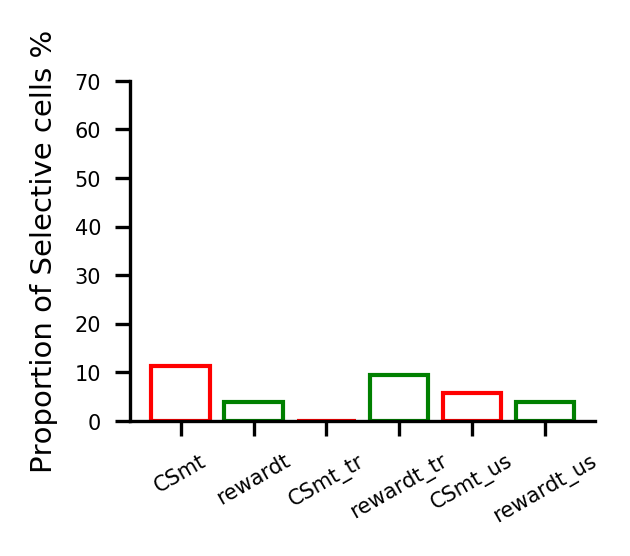

In [14]:
significance = 0.05

trial_types = ['CSmt', 'rewardt', 'CSmt_tr', 'rewardt_tr', 'CSmt_us', 'rewardt_us']
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
values = [np.mean(ut.adjust_pvalues([s[1] for s in selectivity[t][:, 0]])<significance)*100 for t in trial_types]
pt.plot_bars(values, colors=['r', 'g'], ax=ax)
ax.set_xticks(range(len(trial_types)))
ax.set_xticklabels(trial_types, rotation=30)
pt.nicer_plot(ax)
ax.set_ylabel('Proportion of Selective cells %')
ax.set_ylim(0, 70)

fig.savefig('../img/%s__bars.pdf'%NOTEBOOK_NAME, bbox_inches='tight')

In [15]:
selectivity.keys()

['rewardt', 'CSmt_tr', 'CSmt_us', 'CSmt', 'rewardt_tr', 'rewardt_us']

In [16]:
for o in ['CSmt', 'rewardt']:
    exec("cells_%s = ut.adjust_pvalues([s[1] for s in selectivity[\'%s\'][:, 0]])<significance"%(o, o))
cells_CSmt_rwt = cells_CSmt*cells_rewardt

In [17]:
tuned_CSmt = np.argwhere(cells_CSmt).flatten()
tuned_rewardt = np.argwhere(cells_rewardt).flatten()

In [18]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
